In [6]:
# load sequence file

# file_path = "statistics/statistical_evaluationsLeon-Chess-350k-Plus_LoRA_kasparov_5E_0.0001LR_sequences_1000x125.csv"
file_path = "statistics/statistical_evaluations_Leon-Chess-350k-Plus_sequences_1000x125.csv"
# title = "Fine-Tuning (Magnus Carlsen)"
# title = "Fine-Tuning (Garry Kasparov)"
title = "Base Model"

In [7]:
import csv
# example: "Pd2d4- Pd7d5- Pe2e4- Pc7c6- Qd1g4- Ng8f6- ..."

games = []

with open(file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        game = row["First Illegal Move"]
        moves = game.split(" ")
        pieces = [move[0] for move in moves if len(move) == 6]
        games.append(pieces)

for pieces in games:
    if len(pieces) > 0:
        print(pieces[:10])
        # print(len(piece))

max_len = max([len(pieces) for pieces in games])
print(f"max_len = {max_len}")

['P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P']
['P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'N', 'B']
['P', 'P', 'P', 'Q', 'P', 'B', 'N', 'P', 'P', 'B']
['P', 'P', 'P', 'P', 'P', 'P', 'B', 'N', 'N', 'B']
['P', 'P', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'P']
['P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'P', 'N']
['P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P']
['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P']
['P', 'P', 'P', 'P', 'P', 'N', 'P', 'N', 'N', 'B']
['P', 'P', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'P']
['P', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'P']
['P', 'P', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'B']
['P', 'P', 'P', 'P', 'P', 'P', 'N', 'N', 'B', 'B']
['P', 'P', 'P', 'P', 'P', 'P', 'P', 'Q', 'K', 'N']
['P', 'P', 'P', 'P', 'B', 'P', 'B', 'P', 'B', 'P']
['P', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'N', 'B']
['P', 'P', 'P', 'P', 'P', 'P', 'N', 'B', 'B', 'N']
['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'N']
['P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P']
['P', 'P', 'P', 'P', 'P', 'N', 

In [8]:
# create buckets
# [0-20, 21-40, 41-60, 61-80, 81-100, 101-120, 121-140]

buckets = [[], [], [], [], [], [], []]

for pieces in games:
    #print(f"len(pieces) = {len(pieces)}")
    for i in range(len(pieces)):
        piece = pieces[i]
        if i < 20:
            buckets[0].append(piece)
        elif i < 40:
            buckets[1].append(piece)
        elif i < 60:
            buckets[2].append(piece)
        elif i < 80:
            buckets[3].append(piece)
        elif i < 100:
            buckets[4].append(piece)
        elif i < 120:
            buckets[5].append(piece)
        elif i < 140:
            buckets[6].append(piece)
        # elif i < 160:
        #     buckets[7].append(piece)
        # elif i < 180:
        #     buckets[8].append(piece)
        # elif i < 200:
        #     buckets[9].append(piece)

for bucket in buckets:
    print(len(bucket))

for bucket in buckets:
    print(bucket[:20])

19915
18200
12285
5968
2647
886
76
['P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'B', 'P', 'P', 'P', 'P', 'P', 'N', 'B', 'B']
['N', 'K', 'K', 'Q', 'B', 'Q', 'N', 'R', 'Q', 'Q', 'Q', 'R', 'N', 'N', 'B', 'N', 'B', 'B', 'R', 'R']
['N', 'N', 'P', 'B', 'N', 'B', 'B', 'R', 'B', 'R', 'B', 'N', 'B', 'P', 'P', 'P', 'P', 'R', 'R', 'R']
['R', 'R', 'R', 'R', 'B', 'N', 'R', 'K', 'B', 'K', 'Q', 'K', 'P', 'K', 'R', 'P', 'R', 'K', 'P', 'P']
['K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'B', 'K', 'B', 'K', 'B', 'K', 'B', 'K', 'B']
['K', 'P', 'R', 'K', 'R', 'R', 'R', 'K', 'R', 'K', 'P', 'K', 'K', 'R', 'K', 'Q', 'K', 'R', 'K', 'Q']
['R', 'K', 'R', 'Q', 'K', 'R', 'K', 'K', 'K', 'K', 'P', 'R', 'K', 'R', 'K', 'R', 'K', 'Q', 'K', 'K']


## VISUALIZATION (ABSOLUTE)

/var/folders/h3/3d89qwl94937xcsw4qq0hh2c0000gn/T/ipykernel_86321/2325136313.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, rotation=45)


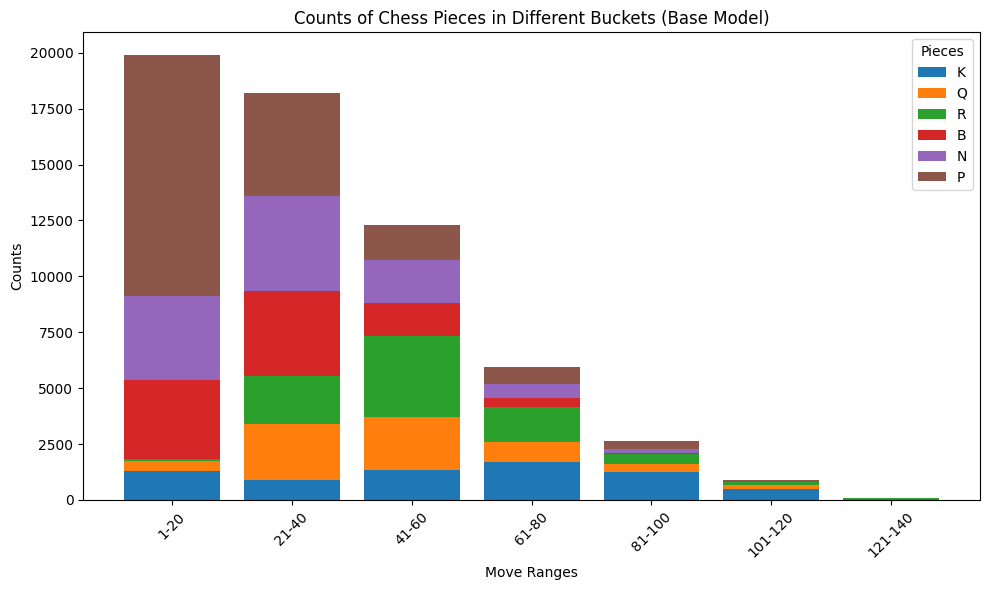

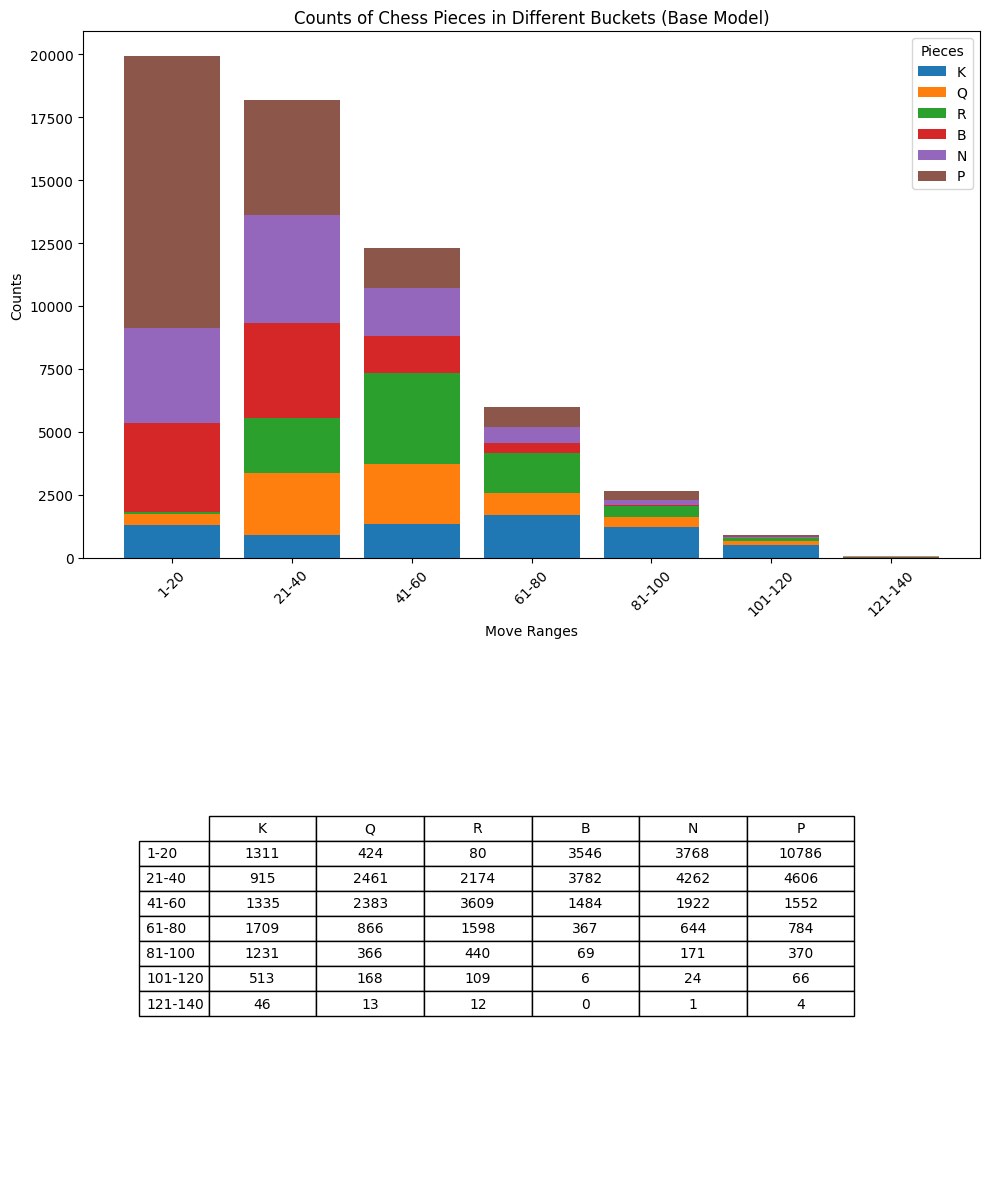

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming buckets is already defined as in your code

# List of pieces to count
pieces = ['K', 'Q', 'R', 'B', 'N', 'P']
piece_counts = {piece: [0] * len(buckets) for piece in pieces}

# Count the pieces in each bucket
for i, bucket in enumerate(buckets):
    for piece in bucket:
        if piece in piece_counts:
            piece_counts[piece][i] += 1

# Data for plotting
labels = [f'{i*20+1}-{(i+1)*20}' for i in range(len(buckets))]
piece_data = np.array([piece_counts[piece] for piece in pieces])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bottom = np.zeros(len(buckets))

for i, piece in enumerate(pieces):
    ax.bar(labels, piece_data[i], bottom=bottom, label=piece)
    bottom += piece_data[i]

ax.set_xlabel('Move Ranges')
ax.set_ylabel('Counts')
ax.set_title(f'Counts of Chess Pieces in Different Buckets ({title})')
ax.legend(title='Pieces')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"statistics/statistical_evaluations_{title}_absolute_plot.png")

# plt.show()

# Create a table with the results
df = pd.DataFrame(piece_counts, index=labels)
df.index.name = 'Move Range'
# print(df)

df.to_csv(f"statistics/statistical_evaluations_{title}_absolute.csv")

# Display the table alongside the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting the stacked bar chart
bottom = np.zeros(len(buckets))
for i, piece in enumerate(pieces):
    ax1.bar(labels, piece_data[i], bottom=bottom, label=piece)
    bottom += piece_data[i]

ax1.set_xlabel('Move Ranges')
ax1.set_ylabel('Counts')
ax1.set_title(f'Counts of Chess Pieces in Different Buckets ({title})')
ax1.legend(title='Pieces')
ax1.set_xticklabels(labels, rotation=45)

# Plotting the table
ax2.axis('tight')
ax2.axis('off')

table = ax2.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', cellLoc='center', colWidths=[0.1]*len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.savefig(f"statistics/statistical_evaluations_{title}_absolute_plot_plus_table.png")
plt.show()


## VISUALIZATION (RELATIVE)

/var/folders/h3/3d89qwl94937xcsw4qq0hh2c0000gn/T/ipykernel_86321/201063690.py:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: f'{x:.2f}')
/var/folders/h3/3d89qwl94937xcsw4qq0hh2c0000gn/T/ipykernel_86321/201063690.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, rotation=45)


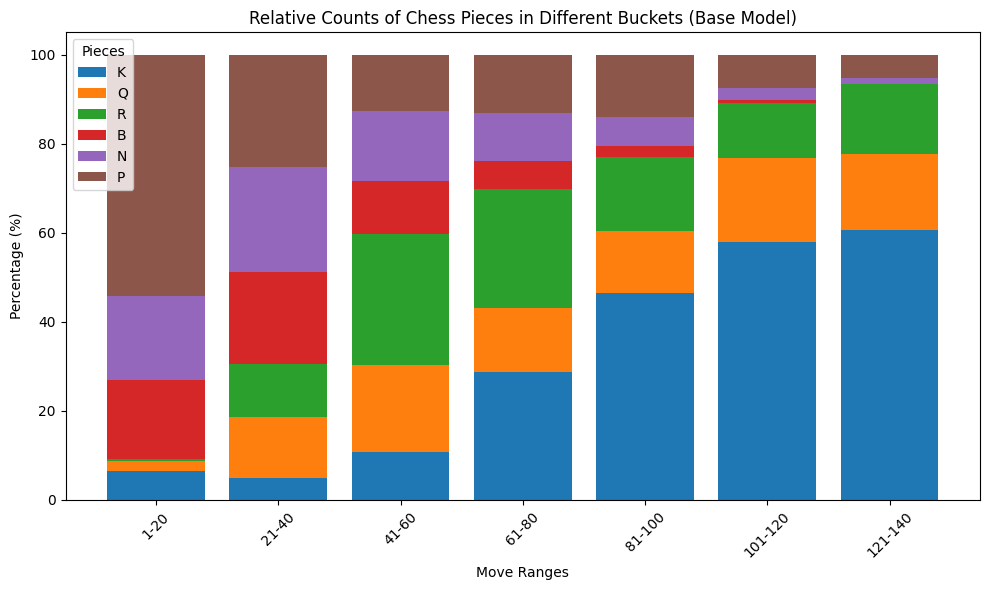

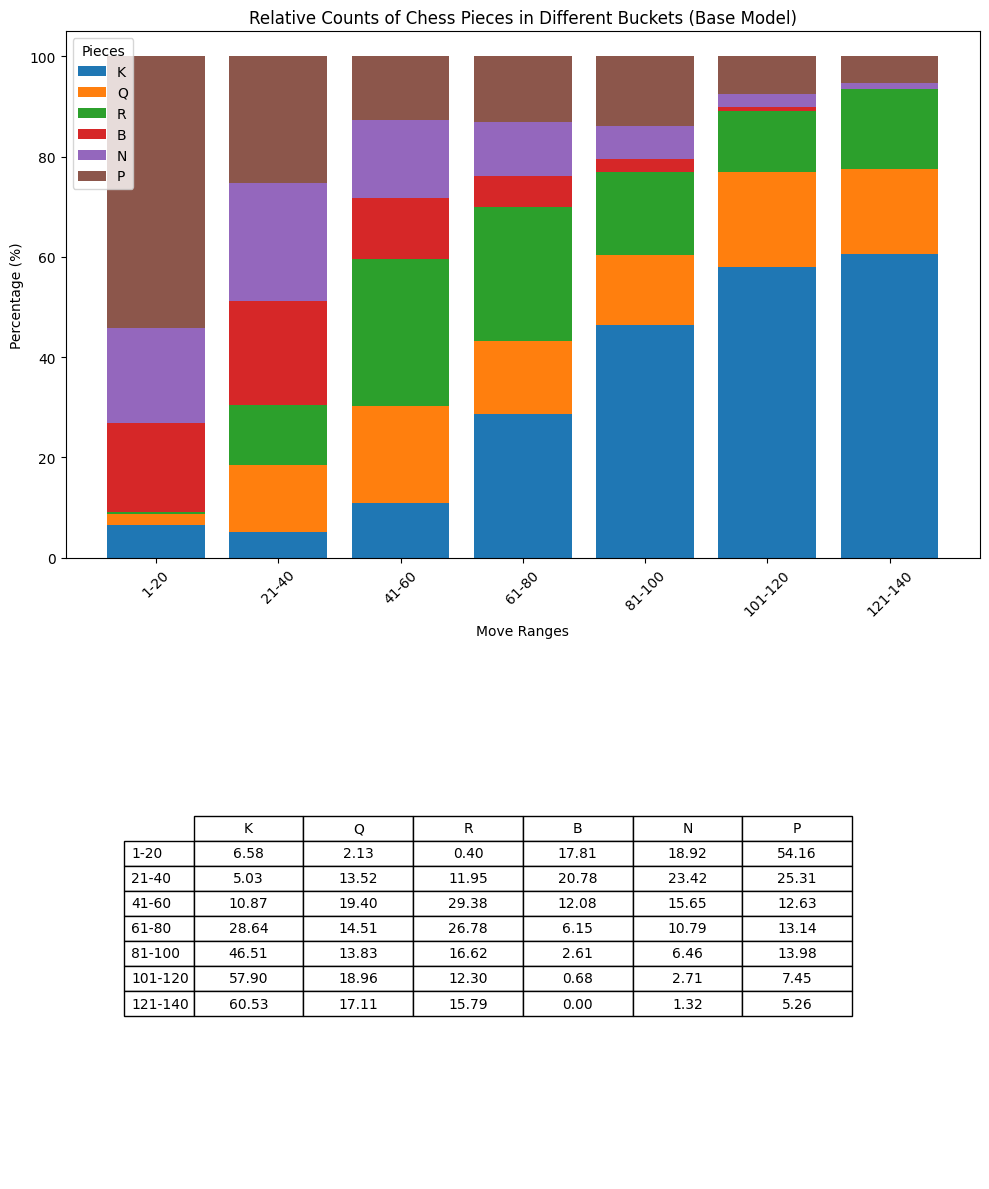

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming buckets is already defined as in your code

# List of pieces to count
pieces = ['K', 'Q', 'R', 'B', 'N', 'P']
piece_counts = {piece: [0] * len(buckets) for piece in pieces}

# Count the pieces in each bucket
for i, bucket in enumerate(buckets):
    for piece in bucket:
        if piece in piece_counts:
            piece_counts[piece][i] += 1

# Convert counts to relative values (percentages)
total_counts = np.sum([piece_counts[piece] for piece in pieces], axis=0)
relative_piece_counts = {piece: [count / total * 100 if total > 0 else 0 for count, total in zip(piece_counts[piece], total_counts)] for piece in pieces}

# Data for plotting
labels = [f'{i*20+1}-{(i+1)*20}' for i in range(len(buckets))]
relative_piece_data = np.array([relative_piece_counts[piece] for piece in pieces])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bottom = np.zeros(len(buckets))

for i, piece in enumerate(pieces):
    ax.bar(labels, relative_piece_data[i], bottom=bottom, label=piece)
    bottom += relative_piece_data[i]

ax.set_xlabel('Move Ranges')
ax.set_ylabel('Percentage (%)')
ax.set_title(f'Relative Counts of Chess Pieces in Different Buckets ({title})')
ax.legend(title='Pieces')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"statistics/statistical_evaluations_{title}_relative_plot.png")

# plt.show()

# Create a table with the results
df = pd.DataFrame(relative_piece_counts, index=labels)
df.index.name = 'Move Range'
# print(df)

# Format the table to show percentages with two decimals
df = df.applymap(lambda x: f'{x:.2f}')

df.to_csv(f"statistics/statistical_evaluations_{title}_relative.csv")

# Display the table alongside the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting the stacked bar chart
bottom = np.zeros(len(buckets))
for i, piece in enumerate(pieces):
    ax1.bar(labels, relative_piece_data[i], bottom=bottom, label=piece)
    bottom += relative_piece_data[i]

ax1.set_xlabel('Move Ranges')
ax1.set_ylabel('Percentage (%)')
ax1.set_title(f'Relative Counts of Chess Pieces in Different Buckets ({title})')
ax1.legend(title='Pieces')
ax1.set_xticklabels(labels, rotation=45)

# Plotting the table
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', cellLoc='center', colWidths=[0.1]*len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.savefig(f"statistics/statistical_evaluations_{title}_relative_plot_plus_table.png")
plt.show()